In [1]:
using DifferentialEquations, QuadGK

In [3]:
#Problema tres cuerpos
#using OrdinaryDiffEq, Plots, QuadGK

# Three Body

α=2.4


s₁=1
s₂=α
#Revisar
m₁=4*(α^4-2*α^2+1)*(17*α^4-2*α^2+1)/(128*α^3*(α^2+1)+(α^4-2*α^2+1)^2)
m₂=4*α^2*(-8*α^2+α*(α^4-2*α^2+1)-8)*(α^4-2*α^2+1)/(128*α^3*(α^2+1)+(α^4-2*α^2+1)^2)
# -------
M=[1 0 0 0;0 -1 0 0; 0 0 -1 0;0 0 0 1]
u1=eye(4)

function Fuerza3c(du,u,p,t)
  r₁ = (s₁^2 +u[1]^2)^(3/2)
  r₂ = (s₂^2 +u[1]^2)^(3/2)
  du[1] = u[2]
  du[2] =-2m₁/r₁*u[1]-2m₂/r₂*u[1] #----
end

#Altura máxima de la partícula

function CoefEst(z₀)
#function CoefEst(v₀)
#Periodo de la partícula
  #E=v₀^2/2-2
#REVISAR
  r₁ = (s₁^2 +z₀^2)^.5
  r₂ = (s₂^2 +z₀^2)^.5
  E=-2m₁/r₁-2m₂/r₂
  #z₀=  v₀*sqrt(8-v₀^2 )/(4-v₀^2 )/2
  f(z)=1/sqrt(E+2m₁/sqrt(s₁^2+z^2)+2m₂/sqrt(s₂^2+z^2)) #-------
  T₀=quadgk(f,0,z₀-1e-10)
  T= T₀[1]/2^.5
  # Sistema no lineal


  u0 = [z₀,0.0]
  #u0 = [0,v₀]
  tspan = (0.0,T)

  prob_ode_trescuerpos = ODEProblem(Fuerza3c,u0,tspan)
  sol = solve(prob_ode_trescuerpos,TsitPap8())
  #Matríz Variacional

  Φ₁(t)=s₁^2+(sol(t)[1])^2
  Φ₂(t)=s₂^2+(sol(t)[1])^2

# REVISAR
  F₁(t)=1-2m₁*(-3*s₁^2/Φ₁(t)^(5/2)+1/Φ₁(t)^(3/2))-2m₂*(-3*s₂^2/Φ₂(t)^(5/2)+1/Φ₂(t)^(3/2))
  F₂(t)= 1-2m₂*1/Φ₂(t)^(3/2)-2m₁/Φ₁(t)^(3/2)

  A(t)=[0 0 1 0;0 0 0 1; F₁(t) 0 0 2; 0 F₂(t) -2 0 ]
#-------
  #Sistema Ecuaciones Variacionales
  variacional(u,p,t)=A(t)*u


  prob_ode_variacional = ODEProblem(variacional,u1,tspan)
  so_var = solve(prob_ode_variacional)
  #Matríz monodromía

  G=(M*inv(so_var(T))*M*so_var(T))^2
  #Coeficientes de estabilidad
  p=-trace(G)
  q=.5*(p^2-trace(G^2))

  Δ=sqrtm(p^2-4(q-2))

  a₁=.5*(p+Δ)
  a₂=.5*(p-Δ)
  return (a₁,a₂,T,Δ)
end
#
v=linspace(10.3,	15.13,	1000)
k=length(v)
a₁=Array{Complex{Float64}}(k)
a₂ =Array{Complex{Float64}}(k)
T =Array{Float64}(k)
Δ =Array{Complex{Float64}}(k)
for i=1:k
  a₁[i],a₂[i],T[i],Δ[i]=CoefEst(v[i])
end

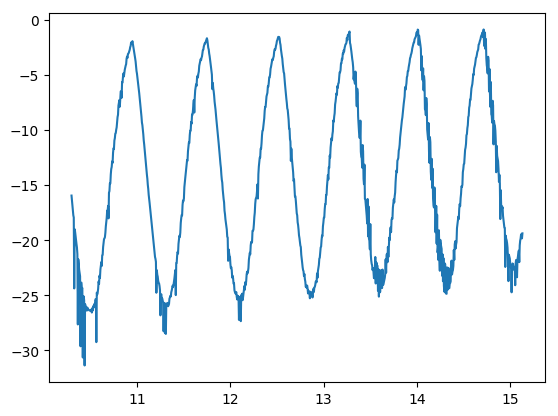

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff4296c1c90>

In [11]:
plot(v,a₂)

In [5]:
using PyPlot

In [7]:
plot!(v,a₂)

LoadError: [91mUndefVarError: plot! not defined[39m